In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import date
import re
%matplotlib inline

C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
train = pd.read_csv('train.csv')
test_X = pd.read_csv('test_x.csv')
test_Y = pd.read_csv('test_y.csv')
print("Shape of training set: ", train.shape)
print("Shape of test set: ", test_X.shape)

Shape of training set:  (233154, 41)
Shape of test set:  (112392, 40)


In [5]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [7]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [8]:
test_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 2 columns):
UniqueID        112392 non-null int64
loan_default    112392 non-null int64
dtypes: int64(2)
memory usage: 1.7 MB


In [9]:
train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [10]:
train.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [11]:
test_X.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [12]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [13]:
# filling the missing values in the Employment.Type attribute of train and test sets

# Employement Type has two types of Employment: self employed and salaried
# The values that are empty must be that 
# let's fill unemployed in the place of empty values

train = train.fillna('Unemployed', axis=1)
test_X = test_X.fillna('Unemployed', axis=1)
print("Number of null values in training set: ", train.isna().sum().sum())
print("Number of null values in test set: ", test_X.isna().sum().sum())

Number of null values in training set:  0
Number of null values in test set:  0


In [14]:
# Save the training y values
y_train = train['loan_default']

# Drop the last column from the 
train = train.drop('loan_default', axis=1)

In [15]:
print(train.shape)

# Combine the train and test sets for analysis
df = pd.concat([train, test_X], axis=0)

print(df.shape)

(233154, 40)
(345546, 40)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345546 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               345546 non-null int64
disbursed_amount                       345546 non-null int64
asset_cost                             345546 non-null int64
ltv                                    345546 non-null float64
branch_id                              345546 non-null int64
supplier_id                            345546 non-null int64
manufacturer_id                        345546 non-null int64
Current_pincode_ID                     345546 non-null int64
Date.of.Birth                          345546 non-null object
Employment.Type                        345546 non-null object
DisbursalDate                          345546 non-null object
State_ID                               345546 non-null int64
Employee_code_ID                       345546 non-null int64
MobileNo_Avl_Flag                      345546 non-null int64
Aadhar_flag                   

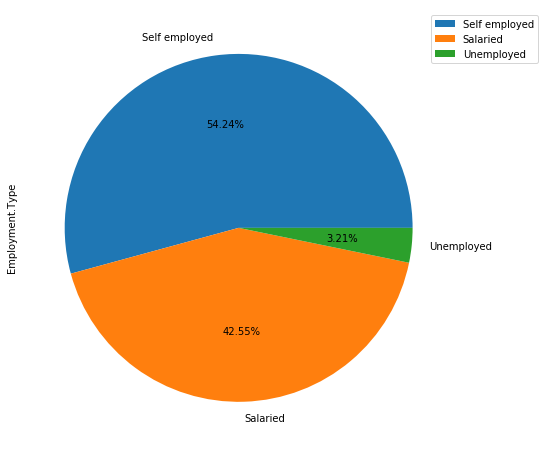

In [17]:
plt.figure(figsize=(8, 8))
df['Employment.Type'].value_counts().plot.pie(autopct='%.2f%%')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [18]:
# Encode the Employment Type
df['Employment.Type'] = df['Employment.Type'].replace(['Self employed', 'Salaried', 'Unemployed'],
                                                     [0, 1, 2])

In [19]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                          int64
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [20]:
print("Number of Unique Ids:", df['UniqueID'].nunique())
print("Number of Branch Ids:", df['branch_id'].nunique())
print("Number of Supplier Ids:", df['supplier_id'].nunique())
print("Number of Manufacturer Ids:", df['manufacturer_id'].nunique())
print("Number of Current Pincode Ids:", df['Current_pincode_ID'].nunique())
print("Number of State Ids:", df['State_ID'].nunique())
print("Number of Employee Code Ids:", df['Employee_code_ID'].nunique())

Number of Unique Ids: 345546
Number of Branch Ids: 82
Number of Supplier Ids: 3089
Number of Manufacturer Ids: 12
Number of Current Pincode Ids: 7096
Number of State Ids: 22
Number of Employee Code Ids: 3398


C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


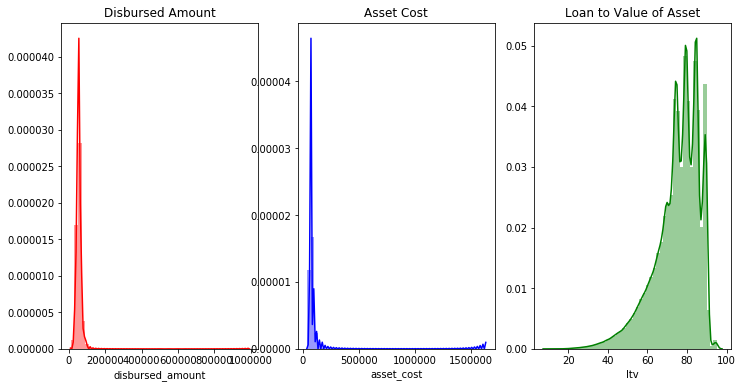

In [21]:
# Check the distribution of the disbursed amount

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

sns.distplot(df['disbursed_amount'], color='red', ax=ax[0])
ax[0].set_title('Disbursed Amount')

sns.distplot(df['asset_cost'], color='blue', ax=ax[1])
ax[1].set_title('Asset Cost')

sns.distplot(df['ltv'], color='green', ax=ax[2])
ax[2].set_title('Loan to Value of Asset')

plt.show()

In [22]:
# Perform a log transformtation to normalize the data
df['disbursed_amount'] = np.log2(df['disbursed_amount'])
df['asset_cost'] = np.log2(df['asset_cost'])
df['ltv'] = np.log2(df['ltv'])

C:\Users\Ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


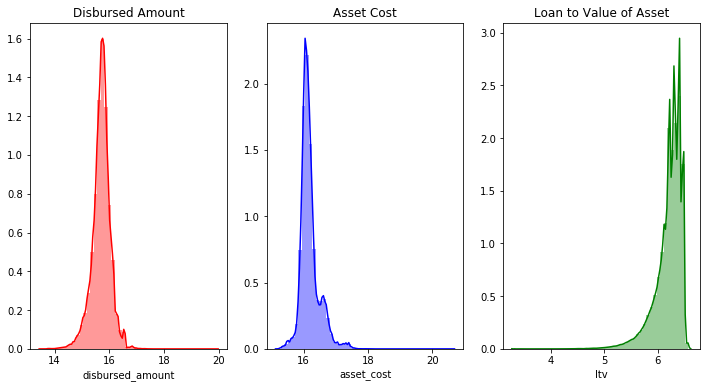

In [23]:
# Check the normalization of the disbursed amount

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

sns.distplot(df['disbursed_amount'], color='red', ax=ax[0])
ax[0].set_title('Disbursed Amount')

sns.distplot(df['asset_cost'], color='blue', ax=ax[1])
ax[1].set_title('Asset Cost')

sns.distplot(df['ltv'], color='green', ax=ax[2])
ax[2].set_title('Loan to Value of Asset')

plt.show()

In [24]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

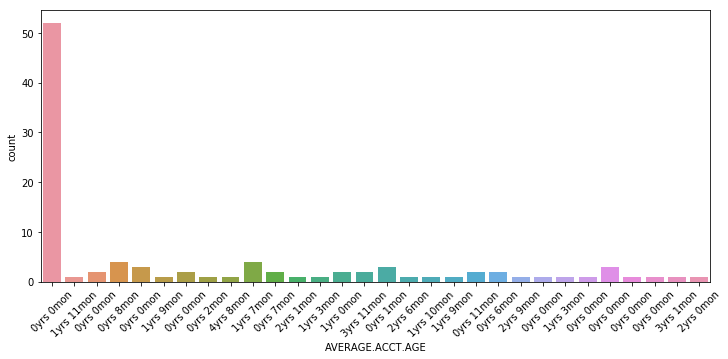

In [40]:
# Check the Account age count
plt.figure(figsize=(12, 5))
ax = sns.countplot(df['AVERAGE.ACCT.AGE'].head(100))
ax.set_xticklabels(df['AVERAGE.ACCT.AGE'].head(100), rotation=45)
plt.show()

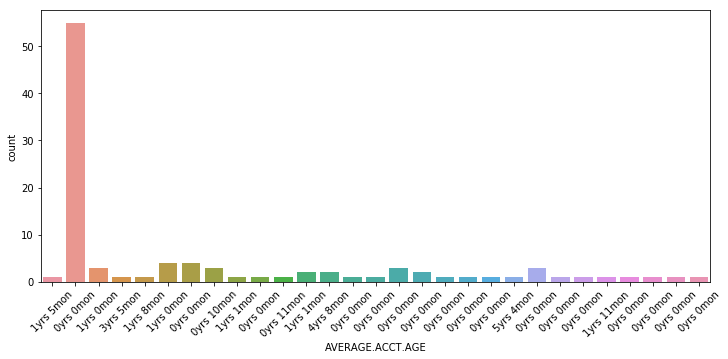

In [37]:
# Check the Account age count
plt.figure(figsize=(12, 5))
ax = sns.countplot(df['AVERAGE.ACCT.AGE'].tail(100))
ax.set_xticklabels(df['AVERAGE.ACCT.AGE'].tail(100), rotation=45)
plt.show()

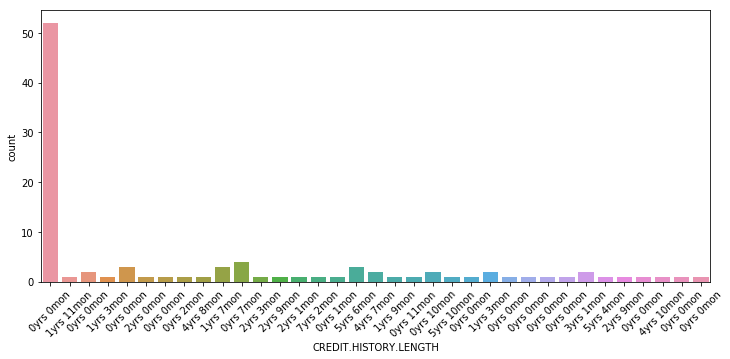

In [43]:
# Check the Credit History distribution
plt.figure(figsize=(12, 5))
ax = sns.countplot(df['CREDIT.HISTORY.LENGTH'].head(100))
ax.set_xticklabels(df['CREDIT.HISTORY.LENGTH'].head(100), rotation=45)
plt.show()

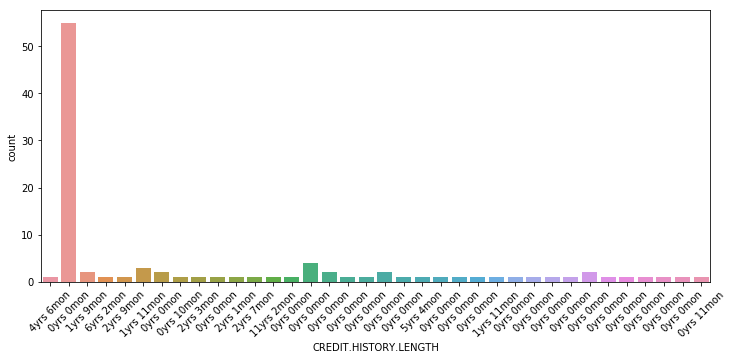

In [42]:
# Check the Credit History Distribution
plt.figure(figsize=(12, 5))
ax = sns.countplot(df['CREDIT.HISTORY.LENGTH'].tail(100))
ax.set_xticklabels(df['CREDIT.HISTORY.LENGTH'].tail(100), rotation=45)
plt.show()

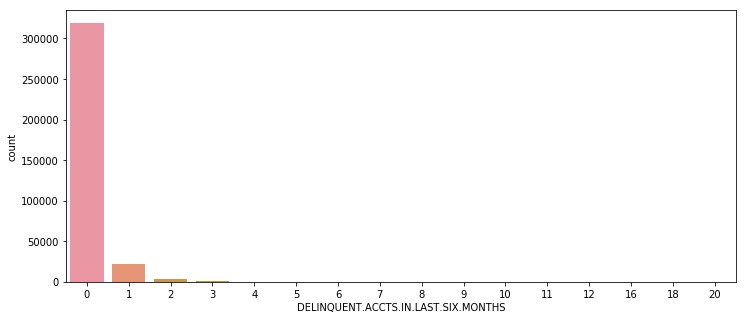

In [48]:
# Check the Credit History Distribution
plt.figure(figsize=(12, 5))
sns.countplot(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
plt.show()

In [7]:
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth']).apply(date.toordinal)
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate']).apply(date.toordinal)

In [8]:
def convert_to_days(date):
    yrs, mon = date.split()
    yrs = re.match(r'\d+', yrs)
    mon = re.match(r'\d+', mon)
    days = int(yrs.group(0))*365 + int(mon.group(0))*30
    return days

In [9]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(convert_to_days)

In [10]:
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(convert_to_days)

In [11]:
le = LabelEncoder()

In [12]:
df['PERFORM_CNS.SCORE.DESCRIPTION'] = le.fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])
df['Employment.Type'] = le.fit_transform(df['Employment.Type'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               225493 non-null int64
disbursed_amount                       225493 non-null int64
asset_cost                             225493 non-null int64
ltv                                    225493 non-null float64
branch_id                              225493 non-null int64
supplier_id                            225493 non-null int64
manufacturer_id                        225493 non-null int64
Current_pincode_ID                     225493 non-null int64
Date.of.Birth                          225493 non-null int64
Employment.Type                        225493 non-null int64
DisbursalDate                          225493 non-null int64
State_ID                               225493 non-null int64
Employee_code_ID                       225493 non-null int64
MobileNo_Avl_Flag                      225493 non-null int64
Aadhar_flag                      

In [14]:
X = df.drop('loan_default', axis=1)
y = df['loan_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
r_forest = RandomForestClassifier(n_estimators=1000, min_samples_leaf=100, max_depth=50, verbose=2)

In [16]:
r_forest.fit(X_train, y_train)

building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building

building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tre

building tree 638 of 1000
building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tre

building tree 954 of 1000
building tree 955 of 1000
building tree 956 of 1000
building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [17]:
pred = r_forest.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.3s finished


In [18]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[52684    38]
 [14871    55]]
0.7796091532639546


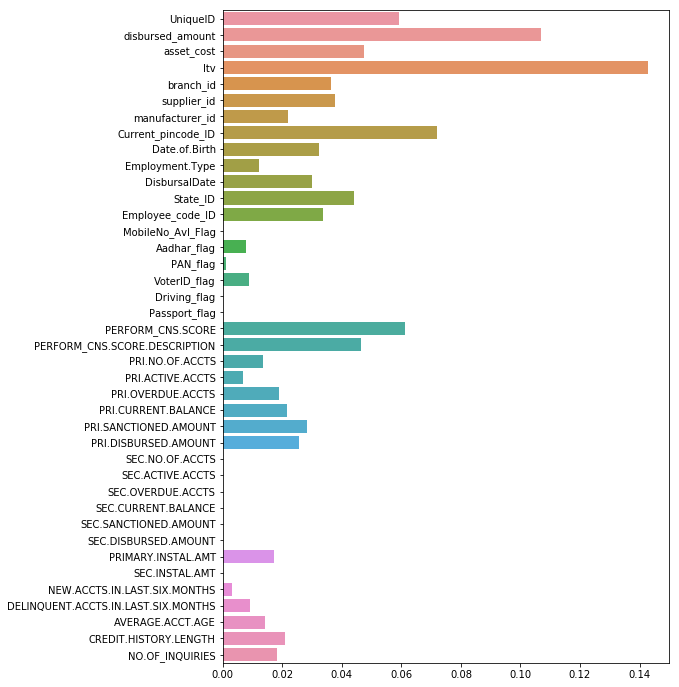

In [19]:
plt.figure(figsize=(8, 12))
sns.barplot(x=r_forest.feature_importances_, y=df.columns[:-1], orient="h")

In [90]:
KNN = KNeighborsClassifier(n_neighbors=6000, algorithm='ball_tree')

In [91]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6000, p=2,
           weights='uniform')

In [92]:
pred = KNN.predict(X_test)

In [93]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[52722     0]
 [14926     0]]
0.7793578524124882
             precision    recall  f1-score   support

          0       0.78      1.00      0.88     52722
          1       0.00      0.00      0.00     14926

avg / total       0.61      0.78      0.68     67648



C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
sgd_c = SGDClassifier(verbose=2, loss='log')

In [85]:
sgd_c.fit(X_train, y_train)

C:\Users\Ethan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 1853273.83, NNZs: 40, Bias: -7.676241, T: 157845, Avg. loss: 1621276710148.840820
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1043961.50, NNZs: 40, Bias: -7.715340, T: 315690, Avg. loss: 27915306785.301735
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 807715.10, NNZs: 40, Bias: -7.761306, T: 473535, Avg. loss: 18638851110.626617
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 826342.72, NNZs: 40, Bias: -7.734166, T: 631380, Avg. loss: 125825462543.163818
Total training time: 0.13 seconds.
-- Epoch 5
Norm: 597640.38, NNZs: 40, Bias: -7.740405, T: 789225, Avg. loss: 102652848400.282471
Total training time: 0.16 seconds.


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=2, warm_start=False)

In [86]:
pred = sgd_c.predict(X_test)

In [89]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[50617  2105]
 [14152   774]]
0.7596824739829706
             precision    recall  f1-score   support

          0       0.78      0.96      0.86     52722
          1       0.27      0.05      0.09     14926

avg / total       0.67      0.76      0.69     67648

